Первый блин комом). Не получилось сделать модель, к сожалению. Сейчас я попробую логистическую регрессию. Я разрабатываю модель для кредитного скоринга. Людям будет интересно, почему же им не выдали кредит. Логистическую регрессию в таком случае будет гораздо легче интерпретировать человеку, нежели градиентный бустинг

Импортируем библиотеки

In [817]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Загрузим данные

In [818]:
X = pd.read_csv('/content/application_info.csv',index_col='id')
y = pd.read_csv('/content/default_flg.csv', index_col='id')


In [819]:
X

,application_dt,sample_cd,education_cd,gender_cd,age,car_own_flg,car_type_flg,appl_rej_cnt,good_work_flg,Score_bki,out_request_cnt,region_rating,home_address_cd,work_address_cd,income,SNA,first_time_cd,Air_flg
id,,,,,,,,,,,,,,,,,,
1,01JAN2014,train,SCH,M,27,Y,Y,0,0,-1.917831,0,40,2,3,32000,1,4,N
2,01JAN2014,train,GRD,F,26,N,N,0,0,-1.153144,2,60,2,3,50000,2,1,N
3,01JAN2014,train,SCH,M,35,N,N,0,1,-1.732810,0,40,1,2,20000,4,3,N
4,01JAN2014,train,GRD,F,35,N,N,0,1,-2.552133,2,20,2,3,80000,1,3,N
5,01JAN2014,train,UGR,F,24,N,N,0,0,-1.914581,1,50,2,3,27000,1,2,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205292,31MAR2015,test,UGR,F,24,N,N,0,1,-2.001592,0,80,1,2,60000,1,3,N
205293,31MAR2015,test,SCH,F,48,N,N,2,1,-2.088683,3,60,1,3,25000,3,2,N
205294,31MAR2015,test,GRD,F,33,Y,Y,0,1,-2.140081,2,80,1,2,100000,1,4,Y


In [820]:
X_train = X[X['sample_cd'] != 'test']
X_test = X[X['sample_cd'] == 'test']

У нас в датасете уже разбиты данные на valid и train выборки. Но я предпочту сделать разбивку самостоятельно чуть попозже

In [821]:
X_test.drop(columns=['sample_cd'],inplace=True)
X_train.drop(columns=['sample_cd'],inplace=True)

/tmp/ipython-input-3895897513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(columns=['sample_cd'],inplace=True)
/tmp/ipython-input-3895897513.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(columns=['sample_cd'],inplace=True)


In [822]:
data = pd.concat([X_train, y], axis = 1)

In [823]:
data

,application_dt,education_cd,gender_cd,age,car_own_flg,car_type_flg,appl_rej_cnt,good_work_flg,Score_bki,out_request_cnt,region_rating,home_address_cd,work_address_cd,income,SNA,first_time_cd,Air_flg,default_flg
id,,,,,,,,,,,,,,,,,,
1,01JAN2014,SCH,M,27,Y,Y,0,0,-1.917831,0,40,2,3,32000,1,4,N,0
2,01JAN2014,GRD,F,26,N,N,0,0,-1.153144,2,60,2,3,50000,2,1,N,0
3,01JAN2014,SCH,M,35,N,N,0,1,-1.732810,0,40,1,2,20000,4,3,N,0
4,01JAN2014,GRD,F,35,N,N,0,1,-2.552133,2,20,2,3,80000,1,3,N,0
5,01JAN2014,UGR,F,24,N,N,0,0,-1.914581,1,50,2,3,27000,1,2,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180812,31AUG2014,GRD,F,60,Y,N,1,0,-2.341941,0,70,2,3,90000,1,3,Y,0
180813,31AUG2014,GRD,F,32,Y,Y,0,0,-1.237068,5,60,2,3,25000,2,3,N,1
180814,31AUG2014,SCH,M,26,Y,Y,0,0,-1.166505,3,60,2,3,35000,1,3,N,0


Во первых, избавимся от дискриминации по половому признаку. Также, в данных есть такой признак, как good_work_flg, как мы помним - все профессии важны, все профессии нужны! Так что не будем делить людей по профессии

In [824]:
data.drop(columns=['gender_cd', 'good_work_flg'], inplace = True)

In [825]:
data.isna().sum()

,0
application_dt,0
education_cd,723
age,0
car_own_flg,0
car_type_flg,0
appl_rej_cnt,0
Score_bki,0
out_request_cnt,0
region_rating,0
home_address_cd,0


В данном прекрасном датасете нет пропусков, лучше и не бывает)

In [826]:
corr = data.corr(numeric_only=True)
corr

,age,appl_rej_cnt,Score_bki,out_request_cnt,region_rating,home_address_cd,work_address_cd,income,SNA,first_time_cd,default_flg
age,1.000000,-0.103324,-0.103324,0.064794,-0.105870,0.013245,-0.002170,-0.036254,-0.045212,0.061596,-0.025964
appl_rej_cnt,-0.103324,1.000000,0.178578,0.144789,-0.036216,0.009707,0.014153,-0.025081,0.061731,-0.070240,0.107177
Score_bki,-0.103324,0.178578,1.000000,0.130301,0.014929,-0.011621,-0.005812,-0.011016,0.058584,-0.064263,0.170857
out_request_cnt,0.064794,0.144789,0.130301,1.000000,-0.000707,0.007987,0.005222,0.067190,0.001206,0.009589,0.065223
region_rating,-0.105870,-0.036216,0.014929,-0.000707,1.000000,0.204374,0.223695,0.226216,-0.086363,0.089211,-0.089609
home_address_cd,0.013245,0.009707,-0.011621,0.007987,0.204374,1.000000,0.758715,0.035287,0.095020,-0.048993,0.055765
work_address_cd,-0.002170,0.014153,-0.005812,0.005222,0.223695,0.758715,1.000000,0.048815,0.092503,-0.052342,0.056023
income,-0.036254,-0.025081,-0.011016,0.067190,0.226216,0.035287,0.048815,1.000000,-0.098363,0.109723,-0.040863
SNA,-0.045212,0.061731,0.058584,0.001206,-0.086363,0.095020,0.092503,-0.098363,1.000000,-0.539823,0.122386
first_time_cd,0.061596,-0.070240,-0.064263,0.009589,0.089211,-0.048993,-0.052342,0.109723,-0.539823,1.000000,-0.096150


<Axes: >

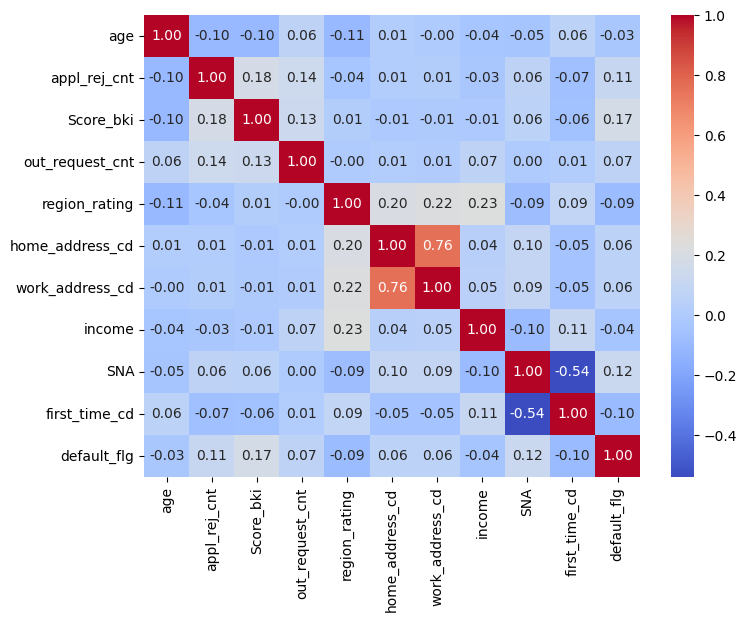

In [827]:
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap='coolwarm', fmt = ".2f")

От данных про адресс нет смысла, уберем их

In [828]:
data['education_cd'] =  data['education_cd'].fillna('NONE')

Еще сильно коррелируют first_time_cd и SNA

<Axes: xlabel='first_time_cd', ylabel='SNA'>

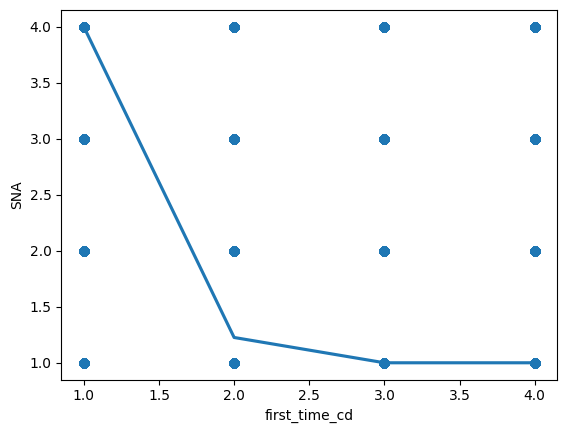

In [829]:
sns.regplot(data=data, x="first_time_cd", y="SNA", lowess=True)

In [830]:
data.drop(columns='SNA', inplace = True)

In [831]:
data.drop(columns='application_dt',inplace=True)

Сделаем кодирование кат. признаков


In [832]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
cat_cols = data.select_dtypes('object').columns

ohe = OneHotEncoder()


encoded = ohe.fit_transform(data[cat_cols])
data = pd.concat([data, pd.DataFrame(encoded.toarray(), columns=ohe.get_feature_names_out(), index=data.index)], axis=1)
data.drop(columns=data.select_dtypes('object').columns, inplace=True)

In [833]:
data['default_flg'].value_counts()

,count
default_flg,
0,159982
1,20834


In [834]:
data['income'] *= data['income']
data['Score_bki'] *= (-1)

Как мы видим, у нас сильный дисбаланс классов

Теперь сделаем разбивку на train/valid данные

In [835]:
from sklearn.model_selection import train_test_split

In [836]:
X_train = data.drop(columns=['default_flg'])
X_t, X_val, y_t, y_val = train_test_split(X_train, y, shuffle=True, train_size=0.3)

Обучим модель, как метрику возьмем f1-score

In [816]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

model = LogisticRegression(max_iter=1000,penalty='l1', solver='liblinear')
model.fit(X_t, y_t)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')

In [837]:
y_prob = model.predict_proba(X_val)[:, 1]
print('roc-auc:',roc_auc_score(y_val, y_prob))

roc-auc: 0.7178022953006878


In [838]:
best_f1 = 0
best_thresh = 0
for thresh in np.linspace(0.01, 0.5, 100):
    y_pred = (y_prob > thresh).astype(int)
    score = f1_score(y_val, y_pred)
    if score > best_f1:
        best_f1 = score
        best_thresh = thresh

print("Лучший порог:", best_thresh)
print("F1-score при этом пороге:", best_f1)

Лучший порог: 0.15848484848484848
F1-score при этом пороге: 0.31888417885956516


In [839]:
X_test.drop(columns=['gender_cd', 'good_work_flg'], inplace = True)
X_test['education_cd'] =  X_test['education_cd'].fillna('NONE')
X_test.drop(columns='SNA', inplace = True)
X_test.drop(columns='application_dt', inplace = True)

encoded = ohe.transform(X_test[cat_cols])
X_test = pd.concat([X_test, pd.DataFrame(encoded.toarray(), columns=ohe.get_feature_names_out(), index=X_test.index)], axis=1)
X_test.drop(columns=X_test.select_dtypes('object').columns, inplace=True)

/tmp/ipython-input-904591612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(columns=['gender_cd', 'good_work_flg'], inplace = True)
/tmp/ipython-input-904591612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['education_cd'] =  X_test['education_cd'].fillna('NONE')
/tmp/ipython-input-904591612.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.

In [840]:
# model.predict_proba(X_test)[0:,1]


submission = pd.DataFrame(model.predict_proba(X_test)[0:,1],columns=['score'], index=X_test.index)
submission['id'] = submission.index
submission.to_csv('./my_submission.csv', index=False)

На kaggle модель предсказала roc-auc 0.71, победа). Сохраним модель

In [841]:
import joblib
joblib.dump(model, 'logreg_model0.pkl')

['logreg_model0.pkl']

In [842]:
X_test.columns

Index(['age', 'appl_rej_cnt', 'Score_bki', 'out_request_cnt', 'region_rating',
       'home_address_cd', 'work_address_cd', 'income', 'first_time_cd',
       'education_cd_ACD', 'education_cd_GRD', 'education_cd_NONE',
       'education_cd_PGR', 'education_cd_SCH', 'education_cd_UGR',
       'car_own_flg_N', 'car_own_flg_Y', 'car_type_flg_N', 'car_type_flg_Y',
       'Air_flg_N', 'Air_flg_Y'],
      dtype='object')